# Data Science Cheat Sheet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Classification Report

In [2]:
def model(X_train,X_test, y_train, y_test):
    knn = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('Results of KNN:\n')
    print('\nClassification Report:KNN\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))

Correlation matrix

In [23]:
#play data
li, sq, cub, quad  = [],[],[],[]
for i in np.arange(.01,1.00,.01):
    li.append(i)
    sq.append((i**2/(25/i)+2))
    cub.append(2*i**3+17*i**2-i)
    quad.append(i**4-1/i**2+17)


In [55]:
df = pd.DataFrame(list(zip(li,sq,cub,quad)))
df.columns=(['li','sq','cub','quad'])
df['norm'] = np.random.normal(7.2, 1.076, 99)
df['rand'] = np.random.uniform(1,100,99)

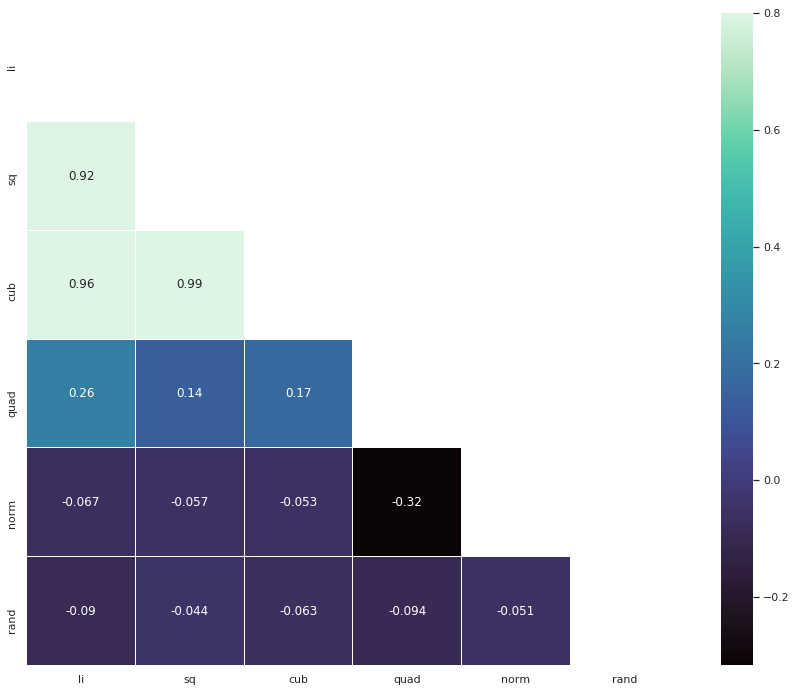

In [56]:
corrmat = df.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(15,12))

    sns.heatmap(corrmat,
            vmax=.8, 
            cmap="mako",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

# hightest correlations

(6, 6)


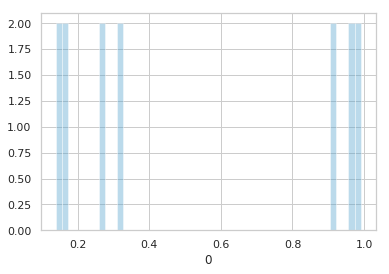

,level_0,level_1,0
8,sq,cub,0.990595
13,cub,sq,0.990595
2,li,cub,0.961110
12,cub,li,0.961110
1,li,sq,0.917563
6,sq,li,0.917563
22,quad,norm,0.316988
27,norm,quad,0.316988
3,li,quad,0.262336
18,quad,li,0.262336


In [61]:
corrmat = df.corr().abs()
print(corrmat.shape)
c = corrmat.unstack().reset_index()
#take a look at the distribution of the higher correlated pairs.
c = c.loc[(c[0]!=1)&(c[0]>.10)]
#plot a histogram
fig = sns.distplot(c[0],kde=False,bins=50)
plt.show()
c.sort_values(by=0,ascending=False)


# Normalize all columns

In [59]:
squares = pd.DataFrame()
logs = pd.DataFrame()
sqrts = pd.DataFrame()
def createfeats (df):
    for col in df:
        squares[col+'_sq'] = df[col]**2
        sqrts[col+'_sqrt'] = df[col]**.5
        mask=(df[col] != 0)
        logable = df[mask]
        logs.loc[mask, col+'_log'] = np.log(logable[col])
    squares.fillna(0, inplace=True)
    sqrts.fillna(0, inplace=True)
    logs.fillna(0, inplace=True)
createfeats(df)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


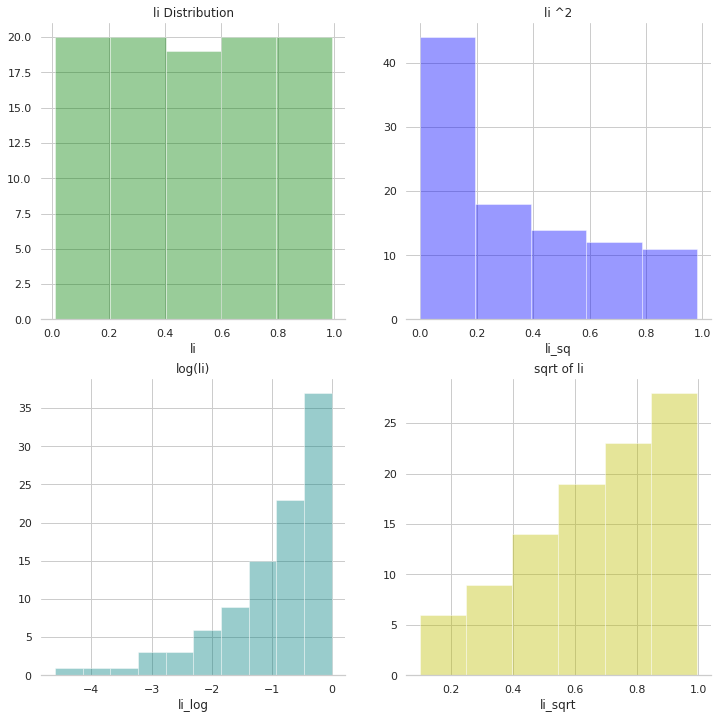

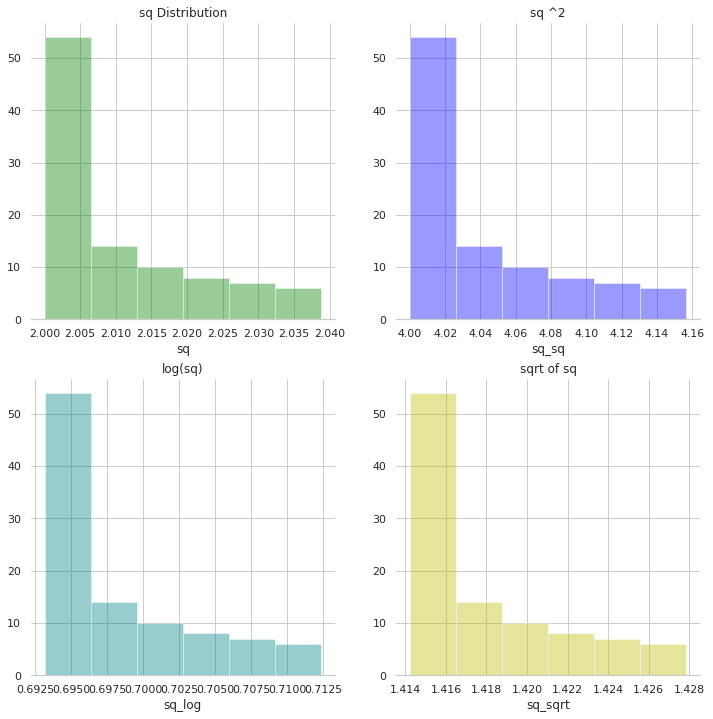

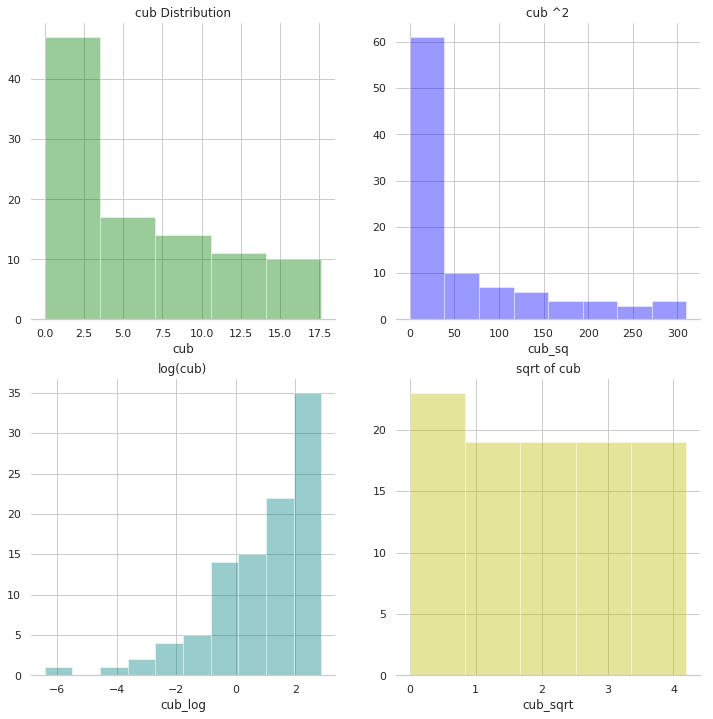

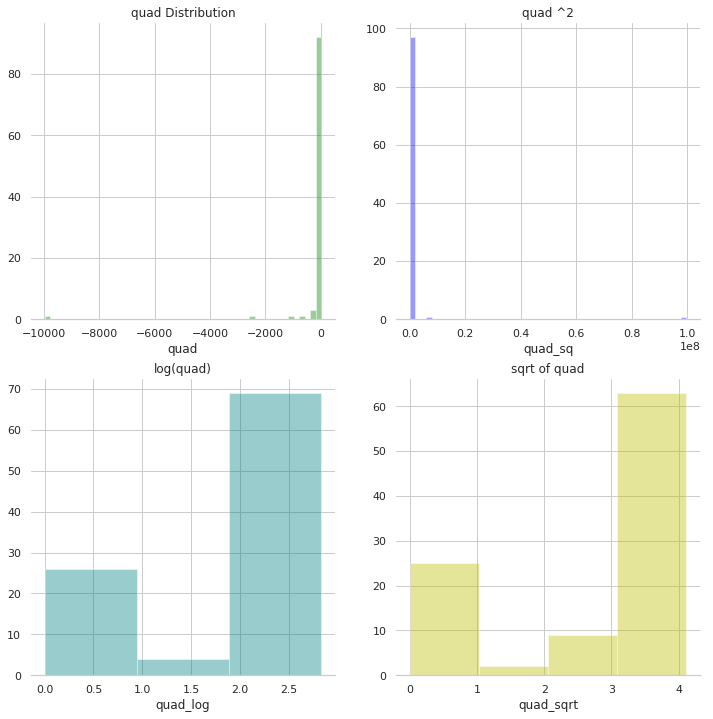

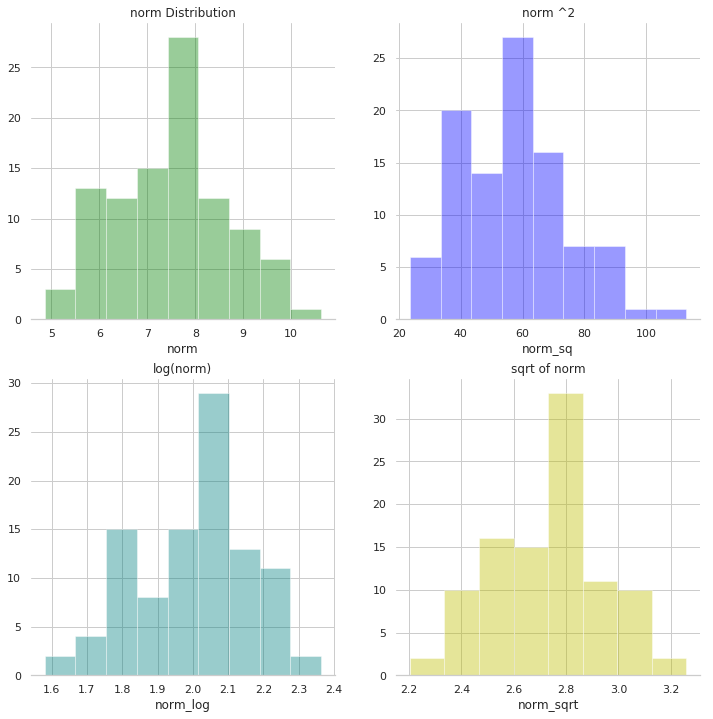

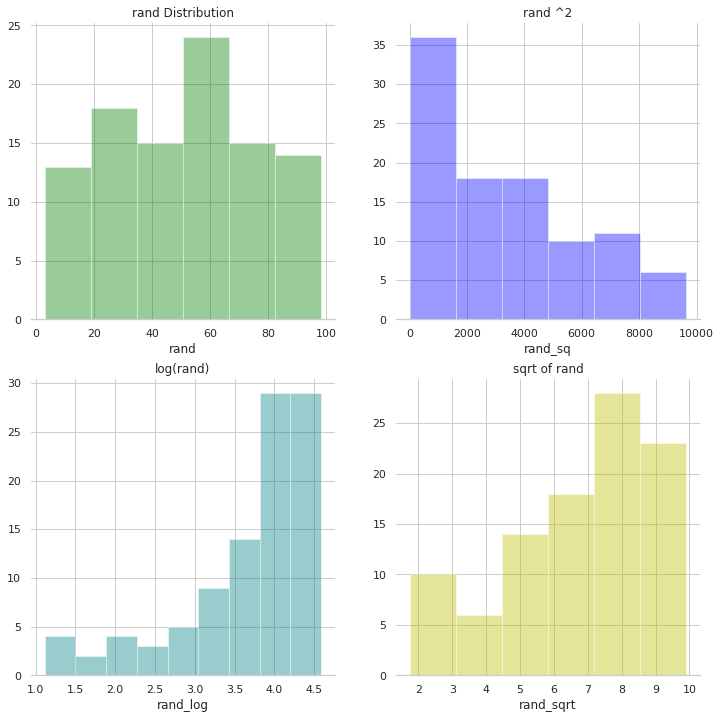

In [60]:
#visualize
for col in df:
    sns.set(style="whitegrid", palette="icefire", color_codes=True)
    f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)
    sns.despine(left=True)
    sns.distplot(df[col], color='g',kde=False, ax=axes[0, 0]).set_title("{} Distribution".format(col))
    sns.distplot(squares[col+'_sq'], color='b',kde=False,ax=axes[0, 1]).set_title("{} ^2".format(col))
    sns.distplot(logs[col+'_log'],color='teal',kde=False, ax=axes[1, 0]).set_title('log({})'.format(col))
    sns.distplot(sqrts[col+'_sqrt'],color='y', kde=False, ax=axes[1, 1]).set_title('sqrt of {}'.format(col))
    plt.show()


# Feature Importance

In [65]:
from sklearn.ensemble import RandomForestRegressor
X, Y = df.drop(['li'],axis=1), df.li
rfc = RandomForestRegressor() #instantiate random forest classifier
rfc.fit(X,Y)
#This time capture output into a dataframe for easier veiwing
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs

,0,1
0,0.4579,cub
1,0.3213,quad
2,0.2200,sq
3,0.0005,rand
4,0.0003,norm
